<a href="https://colab.research.google.com/github/Jaiharish-passion07/Facial_emotion_capstone_project_final/blob/master/Captain_Face_Emotion_Recognition_Ashik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Introduction**

The Indian education landscape has been undergoing rapid changes for the past 10 years owing to
the advancement of web-based learning services, specifically, eLearning platforms.
Global E-learning is estimated to witness an 8X over the next 5 years to reach USD 2B in 2021. India
is expected to grow with a CAGR of 44% crossing the 10M users mark in 2021. Although the market
is growing on a rapid scale, there are major challenges associated with digital learning when
compared with brick and mortar classrooms. One of many challenges is how to ensure quality
learning for students. Digital platforms might overpower physical classrooms in terms of content
quality but when it comes to understanding whether students are able to grasp the content in a live
class scenario is yet an open-end challenge.
In a physical classroom during a lecturing teacher can see the faces and assess the emotion of the
class and tune their lecture accordingly, whether he is going fast or slow. He can identify students who

need special attention. Digital classrooms are conducted via video telephony software program (ex-
Zoom) where it’s not possible for medium scale class (25-50) to see all students and access the

mood. Because of this drawback, students are not focusing on content due to lack of surveillance.
While digital platforms have limitations in terms of physical surveillance but it comes with the power of
data and machines which can work for you. It provides data in the form of video, audio, and texts
which can be analysed using deep learning algorithms. Deep learning backed system not only solves
the surveillance issue, but it also removes the human bias from the system, and all information is no
longer in the teacher’s brain rather translated in numbers that can be analysed and tracked.

# **Problem Statements**

We will solve the above-mentioned challenge by applying deep learning algorithms to live video data.
The solution to this problem is by recognizing facial emotions.

# **Face Emotion Recognition**

This is a few shot learning live face emotion detection system. The model should be able to real-time
identify the emotions of students in a live class.

# **Importing Libraries**

In [1]:
#Importing required libraries
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')


### Importing Libraires required for CNN models ###
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint, EarlyStopping,ReduceLROnPlateau,Callback
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Flatten,Dense, Dropout, Activation, Flatten,Conv2D, MaxPooling2D, SeparableConv2D,Input, GlobalAveragePooling2D,concatenate
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.regularizers import l2
from keras.utils.vis_utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist
from sklearn.metrics import accuracy_score,plot_confusion_matrix,classification_report,roc_curve, roc_auc_score,confusion_matrix
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.applications.densenet import DenseNet121

# **Inspect the Data in First Look**

In [2]:
# mounting drive with google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip "/content/drive/MyDrive/Facial_Emotion_capstone_project/archive.zip" -d "/content/face/"

Archive:  /content/drive/MyDrive/Facial_Emotion_capstone_project/archive.zip
  inflating: /content/face/fer2013.csv  


In [4]:
# Image Reading
img=cv2.imread("/content/download.png")

In [5]:
#image array
img.shape

(200, 132, 3)

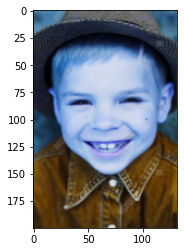

In [6]:
#show the image 
plt.imshow(img)

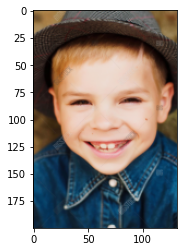

In [7]:
#changing the color rgb
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

# **Loading Dataset and analysing**

In [8]:
#reading csv dataset
df=pd.read_csv("/content/face/fer2013.csv")

In [9]:
#visualizing first five rows of the dataset
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [10]:
## shape of the dataset
df.shape

(35887, 3)

In [11]:
## checking for null values

df.isnull().sum()


emotion    0
pixels     0
Usage      0
dtype: int64

In [12]:
# Value counts on each set
df["Usage"].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

In [13]:
# Value counts on each set
df["emotion"].value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

In [14]:
#unique emotion
df.emotion.unique()

array([0, 2, 4, 6, 3, 5, 1])

In [15]:
#lable of different emotion
emotion_label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}

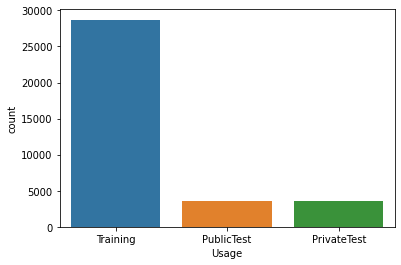

In [16]:
# Let's plot the count of each set
sns.countplot(df.Usage)
plt.show()

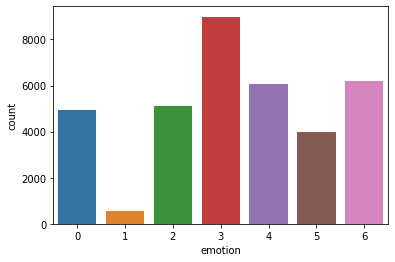

In [17]:
#plot for value count
sns.countplot(df.emotion)
plt.show()

Our dataset have 7 types of emotion ranging form 0-6:

0 ->  Anger,  1 -> Disgust,2 -> Fear, 3 -> Happiness, 4 -> Sad, 5 -> Surprise, 6 -> Neutral

After looking bar plot we can observe that majority of the classes belongs to 3:Happy, 4:Sad *and *6:Neutral on the otherside 0:anger, 2: Sad and 5:surprise are avarage and 1:disgust is very low in number 

# **Displaying Imgages**

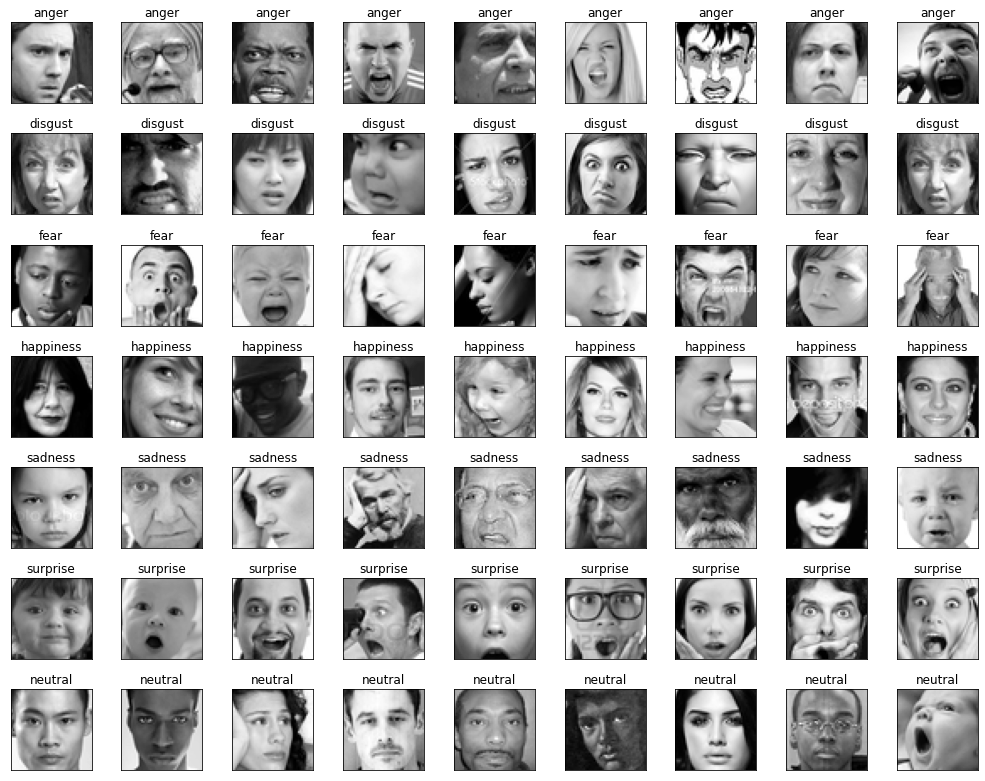

In [18]:
# size of the image: 48*48 pixels

fig = plt.figure(1, (14, 14))

k = 0
for label in sorted(df.emotion.unique()):
    for j in range(9):
        px = df[df.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')

        k += 1
        ax = plt.subplot(9, 9, k)
        ax.imshow(px, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(emotion_label_to_text[label])
        plt.tight_layout()

Now prepare data for campatible for neural network

#**Parameters**

In [19]:
# Defining the parameters used in this project
batch_size = 32
num_epochs = 50
input_shape = (48, 48, 1)
validation_split = .2
verbose = 1
num_classes = 7
base_path = 'models/'
shape_x = 48
shape_y = 48
image_size=(48,48)

# **Prepocessing**

In [20]:
#image processing
df['pixels']=df['pixels'].astype("string")
pixels = df['pixels'].tolist()
width, height = 48, 48
faces = []
for pixel_sequence in pixels:
    face = [int(pixel) for pixel in pixel_sequence.strip().split(' ',48*48)]
    face = np.asarray(face).reshape(width, height)
    face = cv2.resize(face.astype('uint8'),image_size)
    faces.append(face.astype('float32'))
faces = np.asarray(faces)
faces = np.expand_dims(faces, -1)
faces /= 127.5
faces -= 1.
emotions = pd.get_dummies(df['emotion']).to_numpy()

# **Splitting the data into training and validation set.**

In [21]:
#dataset sp,it for training model 
X_train, X_valid, y_train, y_valid = train_test_split(faces,emotions,
                                                    shuffle=True,
                                                    test_size=0.2, random_state=42)
X_valid,X_test,y_valid,y_test=train_test_split(faces,emotions,test_size=0.2,shuffle=True)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape,X_test.shape,y_test.shape

((28709, 48, 48, 1),
 (28709, 48, 48, 1),
 (28709, 7),
 (28709, 7),
 (7178, 48, 48, 1),
 (7178, 7))

In [22]:
#variable allocation
img_width = X_train.shape[1]
img_height = X_train.shape[2]
img_depth = X_train.shape[3]
num_classes = y_train.shape[1]

# **Data Augmentation**
"taking the batch and apply some series of random transformations (random rotation, resizing, shearing) to increase generalizability of model".

In [23]:
# As the data in hand is less as compared to the task so ImageDataGenerator is good to go.
train_datagen = ImageDataGenerator(
    rotation_range=15,         # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.15,    # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.15,   # randomly shift images vertically (fraction of total height)
    shear_range=0.15,
    zoom_range=0.15,           # randomly zoom into images
    horizontal_flip=True,      # randomly flip images
)
train_datagen.fit(X_train)

# **1-Mobilenet:**

In [24]:
MobileNet = MobileNet(input_shape=[48,48]+ [1], weights=None, include_top=True,classes=7)

In [25]:
mobile_model = Model(inputs=MobileNet.input, outputs=MobileNet.output)

In [26]:
optim =optimizers.Adam(learning_rate=0.01) 
mobile_model.compile(optimizer=optim,loss='categorical_crossentropy', metrics=['accuracy'])

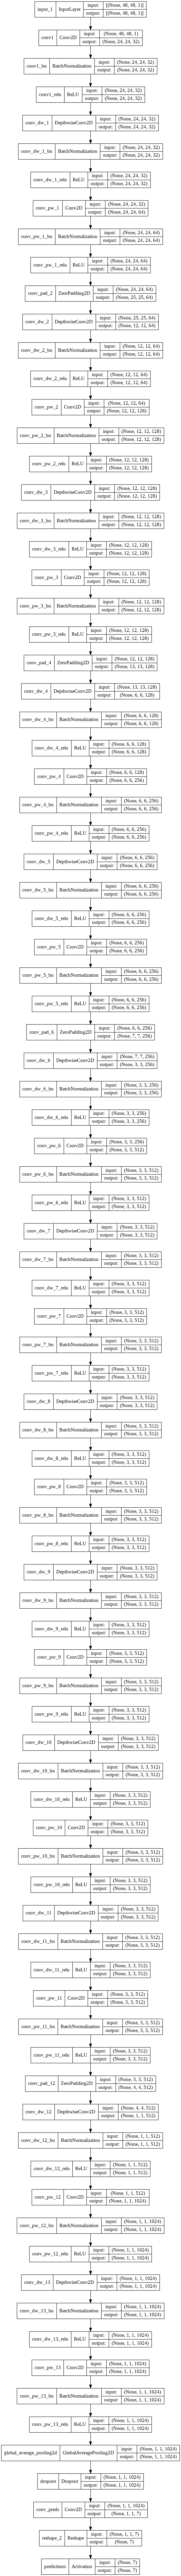

In [27]:
#plot for architechture
plot_model(mobile_model, to_file='mobile_net.png', show_shapes=True, show_layer_names=True)

In [28]:
#model compilation
mobile_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv1 (Conv2D)              (None, 24, 24, 32)        288       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 24, 24, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 24, 24, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 24, 24, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 24, 24, 32)       128       
 ation)                                                      

# **2-Dexpression**

In [29]:
#function for taking input for the layer
def dexpression():
    inputs = Input(shape=(shape_x, shape_y, 1))

    x = Conv2D(64, 7, strides = 2, padding='same')(inputs)
    x = Activation('relu')(x)
    x = MaxPooling2D(3, strides=2, padding='same')(x)
    x = BatchNormalization()(x)

    x_1 = Conv2D(96, 1, strides = 1, padding='same')(x)
    x_1 = Activation('relu')(x_1)
    x_1 = MaxPooling2D(3, strides=1, padding='same')(x_1)
    x_1 = BatchNormalization()(x_1)

    x_2 = Conv2D(208, 3, strides = 1, padding='same')(x_1)
    x_2 = Activation('relu')(x_2)
    x_2 = MaxPooling2D(3, strides=1, padding='same')(x_2)

    x_3 = Conv2D(64, 1, strides = 1, padding='same')(x_1)
    x_3 = Activation('relu')(x_3)
    x_3 = MaxPooling2D(3, strides=1, padding='same')(x_3)


    x_4=concatenate([x_2,x_3],axis=3)

    x_5 = Conv2D(96, 1, strides = 1, padding='same')(x_4)
    x_5 = Activation('relu')(x_5)
    x_5 = Conv2D(208, 3, strides = 1, padding='same')(x_5)
    x_5 = Activation('relu')(x_5)

    x_6 = MaxPooling2D(3, strides=1, padding='same')(x_4)
    x_6 = Activation('relu')(x_6)
    x_6 = Conv2D(64, 1, strides = 1, padding='same')(x_6)
    x_6 = Activation('relu')(x_6)
    x_6 = MaxPooling2D(3, strides=1, padding='same')(x_6)
    x_7 = concatenate([x_5,x_6],axis=3)

    x_8 = Flatten()(x_7)
    x_8 = Dropout(0.25)(x_8)
    x_8 = Dense(7, activation='softmax')(x_8)
    return Model(inputs, x_8,name='DeXpression')

In [30]:
#model name 
dexpression=dexpression()

In [31]:
#model compilation
dexpression.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
dexpression.summary()

Model: "DeXpression"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 48, 48, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 24, 24, 64)   3200        ['input_2[0][0]']                
                                                                                                  
 activation (Activation)        (None, 24, 24, 64)   0           ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 12, 12, 64)   0           ['activation[0][0]']             
                                                                                        

# **3: CNN :**
Modelling

In [32]:
# Building up Model Architecture
def CNN():
    model = Sequential()

    #1st CNN layer
    model.add(Conv2D(64,(3,3),padding = 'same', name='image_array', input_shape = (48,48,1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(0.25))

    #2nd CNN layer
    model.add(Conv2D(128,(5,5),padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout (0.25))

    #3rd CNN layer
    model.add(Conv2D(512,(3,3),padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout (0.25))

    #4th CNN layer
    model.add(Conv2D(512,(3,3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())

    #Fully connected 1st layer
    model.add(Dense(256))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))


    # Fully connected layer 2nd layer
    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))

    model.add(Dense(num_classes, activation='softmax'))

    return model

In [33]:
#model name
CNN=CNN()

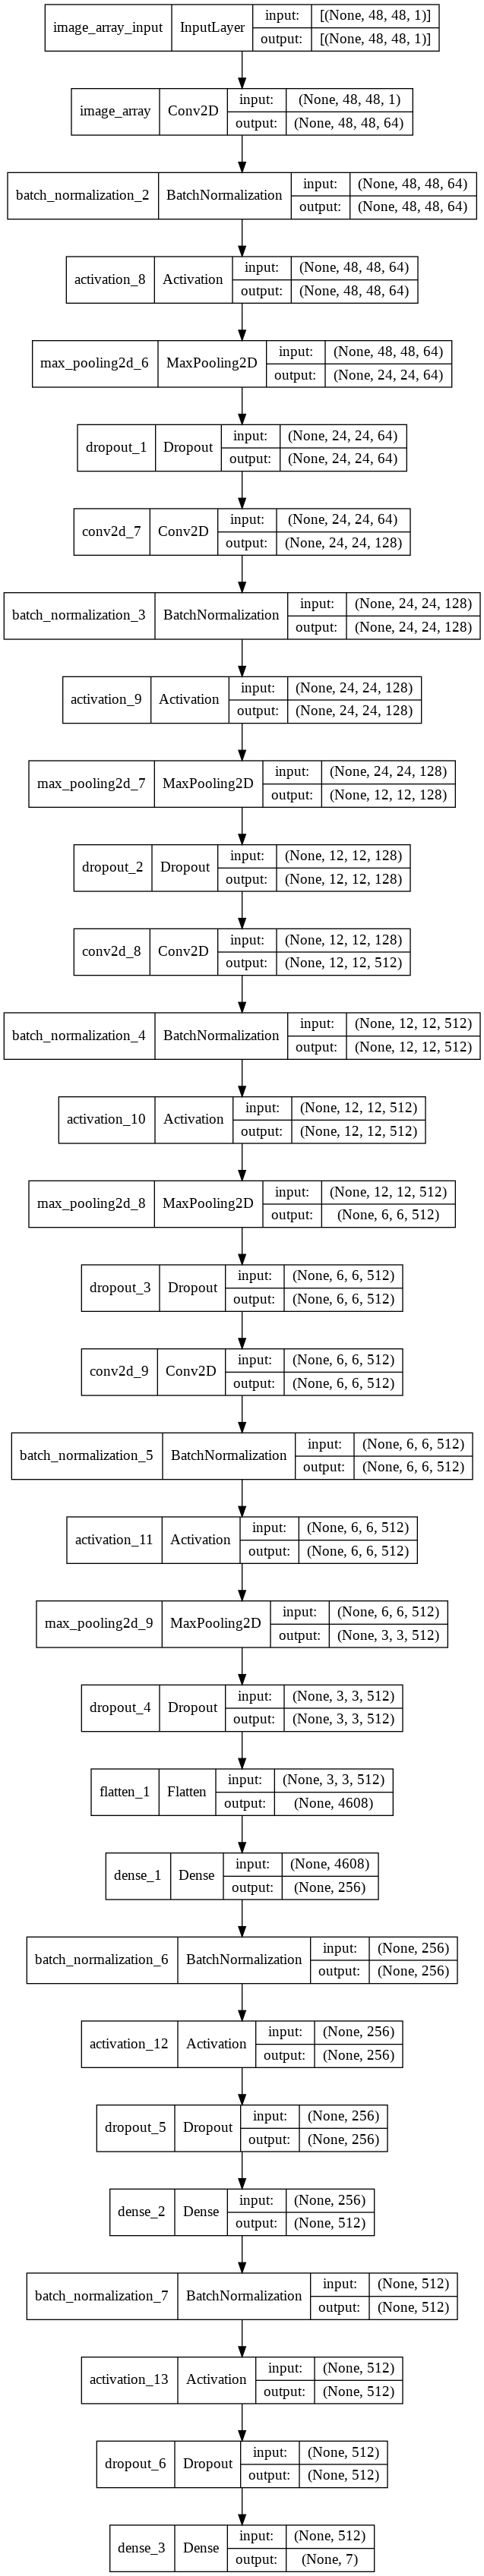

In [34]:
# Plotting architecture of defined model
plot_model(CNN, to_file='CNN.png', show_shapes=True, show_layer_names=True)

In [35]:
# Compiling the model
opt = optimizers.Adam(learning_rate=0.001) #using Adam Optimizer
CNN.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
CNN.summary() #gives the information about the architecture and configuration of the neural network.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image_array (Conv2D)        (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_2 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_8 (Activation)   (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 128)       2

# **4: Densenet :**
Modelling

In [36]:
DenseNet121 = DenseNet121(input_shape=[48,48]+ [1], weights=None, include_top=True,classes=7)
dense_net_model = Model(inputs=DenseNet121.input, outputs=DenseNet121.output)
dense_opt= optimizers.Adam(learning_rate=0.01) #using Adam Optimizer
dense_net_model.compile(optimizer=dense_opt,loss='categorical_crossentropy', metrics=['accuracy'])

# **5: Resnet :**
Modelling

In [37]:
#function for building the residual network 
def build_net(optim):
    """
    This is a Deep Convolutional Neural Network (DCNN). For generalization purpose I used dropouts in regular intervals.
    I used 'ELU' as the activation because it avoids dying relu problem but also performed well as compared to LeakyRelu
    atleast in this case. 'he_normal' kernel initializer is used as it suits ELU. BatchNormalization is also used for better
    results.
    """
    net = Sequential(name='DCNN')

    net.add(
        Conv2D(
            filters=64,
            kernel_size=(5,5),
            input_shape=(img_width, img_height, img_depth),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_1'
        )
    )
    net.add(BatchNormalization(name='batchnorm_1'))
    net.add(
        Conv2D(
            filters=64,
            kernel_size=(5,5),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_2'
        )
    )
    net.add(BatchNormalization(name='batchnorm_2'))
    
    net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_1'))
    net.add(Dropout(0.4, name='dropout_1'))

    net.add(
        Conv2D(
            filters=128,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_3'
        )
    )
    net.add(BatchNormalization(name='batchnorm_3'))
    net.add(
        Conv2D(
            filters=128,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_4'
        )
    )
    net.add(BatchNormalization(name='batchnorm_4'))
    
    net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_2'))
    net.add(Dropout(0.4, name='dropout_2'))

    net.add(
        Conv2D(
            filters=256,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_5'
        )
    )
    net.add(BatchNormalization(name='batchnorm_5'))
    net.add(
        Conv2D(
            filters=256,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_6'
        )
    )
    net.add(BatchNormalization(name='batchnorm_6'))
    
    net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_3'))
    net.add(Dropout(0.5, name='dropout_3'))

    net.add(Flatten(name='flatten'))
        
    net.add(
        Dense(
            128,
            activation='elu',
            kernel_initializer='he_normal',
            name='dense_1'
        )
    )
    net.add(BatchNormalization(name='batchnorm_7'))
    
    net.add(Dropout(0.6, name='dropout_4'))
    
    net.add(
        Dense(
            num_classes,
            activation='softmax',
            name='out_layer'
        )
    )
    
    net.compile(
        loss='categorical_crossentropy',
        optimizer=optim,
        metrics=['accuracy']
    )
    
    net.summary()
    
    return net

# **Training**


Mobilenet

In [38]:
#parameters for training the model
early_stop = EarlyStopping('val_loss', patience=100)
reduce_lr = ReduceLROnPlateau('val_loss', factor=0.1,
                                  patience=50, min_lr=0.00001,model='auto')
trained_models_path = base_path + 'mobilenet'
model_names = trained_models_path + '.{epoch:02d}-{val_accuracy:.2f}.hdf5'
model_checkpoint = ModelCheckpoint(model_names, 'val_loss', verbose=1,
                                                    save_best_only=True)
callbacks = [model_checkpoint, early_stop, reduce_lr]

In [39]:
#model history for further evaluation the performance
mobile_history =mobile_model.fit(train_datagen.flow(X_train, y_train, batch_size),
          steps_per_epoch=len(X_train) / batch_size, 
          epochs=3, 
          verbose=1, 
          callbacks=callbacks,
          validation_data=(X_valid,y_valid))

Epoch 1/3
898/897 [==============================] - ETA: 0s - loss: 1.9184 - accuracy: 0.2484
Epoch 00001: val_loss improved from inf to 1.75419, saving model to models/mobilenet.01-0.28.hdf5
897/897 [==============================] - 57s 51ms/step - loss: 1.9184 - accuracy: 0.2484 - val_loss: 1.7542 - val_accuracy: 0.2834 - lr: 0.0100
Epoch 2/3
897/897 [============================>.] - ETA: 0s - loss: 1.7352 - accuracy: 0.2871
Epoch 00002: val_loss did not improve from 1.75419
897/897 [==============================] - 40s 44ms/step - loss: 1.7355 - accuracy: 0.2872 - val_loss: 1.8737 - val_accuracy: 0.2369 - lr: 0.0100
Epoch 3/3
897/897 [============================>.] - ETA: 0s - loss: 1.6684 - accuracy: 0.3296
Epoch 00003: val_loss improved from 1.75419 to 1.65981, saving model to models/mobilenet.03-0.34.hdf5
897/897 [==============================] - 40s 45ms/step - loss: 1.6684 - accuracy: 0.3295 - val_loss: 1.6598 - val_accuracy: 0.3393 - lr: 0.0100


In [40]:
#save model for the future use  
mobile_model.save('finalmobilenet_model.h5')

Dexpression

In [41]:
#model parameter for taining the model
early_stop = EarlyStopping('val_loss', patience=100)
reduce_lr = ReduceLROnPlateau('val_loss', factor=0.1,
                                  patience=25, min_lr=0.00001,model='auto')
trained_models_path = base_path + '_DeXpression'
model_names = trained_models_path + '.{epoch:02d}-{val_accuracy:.2f}.hdf5'
model_checkpoint = ModelCheckpoint(model_names, 'val_loss', verbose=1,
                                                    save_best_only=True)
callbacks = [model_checkpoint, early_stop, reduce_lr]

In [42]:
#model history for the matrics evaluation
dexpression_history =dexpression.fit(train_datagen.flow(X_train, y_train, batch_size),
          steps_per_epoch=len(X_train) / batch_size, 
          epochs=3, 
          verbose=1, 
          callbacks=callbacks,
          validation_data=(X_valid,y_valid))

Epoch 1/3
897/897 [============================>.] - ETA: 0s - loss: 1.8059 - accuracy: 0.2633
Epoch 00001: val_loss improved from inf to 1.71166, saving model to models/_DeXpression.01-0.30.hdf5
897/897 [==============================] - 35s 38ms/step - loss: 1.8058 - accuracy: 0.2634 - val_loss: 1.7117 - val_accuracy: 0.3035 - lr: 0.0010
Epoch 2/3
897/897 [============================>.] - ETA: 0s - loss: 1.6731 - accuracy: 0.3276
Epoch 00002: val_loss improved from 1.71166 to 1.56742, saving model to models/_DeXpression.02-0.39.hdf5
897/897 [==============================] - 34s 37ms/step - loss: 1.6729 - accuracy: 0.3278 - val_loss: 1.5674 - val_accuracy: 0.3892 - lr: 0.0010
Epoch 3/3
898/897 [==============================] - ETA: 0s - loss: 1.5933 - accuracy: 0.3702
Epoch 00003: val_loss improved from 1.56742 to 1.47256, saving model to models/_DeXpression.03-0.42.hdf5
897/897 [==============================] - 36s 41ms/step - loss: 1.5933 - accuracy: 0.3702 - val_loss: 1.4726 - 

In [43]:
#save model for further use
dexpression.save('finaldexpression_model.h5')

CNN

In [44]:
#model parameter for taining the model
early_stop = EarlyStopping('val_loss', patience=100)
reduce_lr = ReduceLROnPlateau('val_loss', factor=0.1,
                                  patience=25, min_lr=0.00001,model='auto')
trained_models_path = base_path + 'cnn'
model_names = trained_models_path + '.{epoch:02d}-{val_accuracy:.2f}.hdf5'
model_checkpoint = ModelCheckpoint(model_names, 'val_loss', verbose=1,
                                                    save_best_only=True)
callbacks = [model_checkpoint, early_stop, reduce_lr]

In [45]:
#model history for the matrics evaluation
CNN_history =CNN.fit(train_datagen.flow(X_train, y_train, batch_size),
          steps_per_epoch=len(X_train) / batch_size, 
          epochs=3, 
          verbose=1, 
          callbacks=callbacks,
          validation_data=(X_valid,y_valid))

Epoch 1/3
897/897 [============================>.] - ETA: 0s - loss: 1.8536 - accuracy: 0.2650
Epoch 00001: val_loss improved from inf to 1.57924, saving model to models/cnn.01-0.38.hdf5
897/897 [==============================] - 45s 48ms/step - loss: 1.8530 - accuracy: 0.2652 - val_loss: 1.5792 - val_accuracy: 0.3823 - lr: 0.0010
Epoch 2/3
898/897 [==============================] - ETA: 0s - loss: 1.6024 - accuracy: 0.3749
Epoch 00002: val_loss improved from 1.57924 to 1.43350, saving model to models/cnn.02-0.44.hdf5
897/897 [==============================] - 43s 47ms/step - loss: 1.6024 - accuracy: 0.3749 - val_loss: 1.4335 - val_accuracy: 0.4419 - lr: 0.0010
Epoch 3/3
897/897 [============================>.] - ETA: 0s - loss: 1.4536 - accuracy: 0.4385
Epoch 00003: val_loss improved from 1.43350 to 1.28574, saving model to models/cnn.03-0.50.hdf5
897/897 [==============================] - 43s 48ms/step - loss: 1.4537 - accuracy: 0.4384 - val_loss: 1.2857 - val_accuracy: 0.5015 - lr: 

In [46]:
# Save best Model
CNN.save('finalcnn_model.h5')

Densenet

In [47]:
#model parameter for taining the model
early_stop = EarlyStopping('val_loss', patience=100)
reduce_lr = ReduceLROnPlateau('val_loss', factor=0.1,
                                  patience=25, min_lr=0.00001,model='auto')
trained_models_path = base_path + 'densenet'
model_names = trained_models_path + '.{epoch:02d}-{val_accuracy:.2f}.hdf5'
model_checkpoint = ModelCheckpoint(model_names, 'val_loss', verbose=1,
                                                    save_best_only=True)
callbacks = [model_checkpoint, early_stop, reduce_lr]

In [48]:
#model history for the matrics evaluation
dense_net_history =dense_net_model.fit(train_datagen.flow(X_train, y_train, batch_size),
          steps_per_epoch=len(X_train) / batch_size, 
          epochs=3, 
          verbose=1, 
          callbacks=callbacks,
          validation_data=(X_valid,y_valid))

Epoch 1/3
898/897 [==============================] - ETA: 0s - loss: 1.9933 - accuracy: 0.2408
Epoch 00001: val_loss improved from inf to 1.79890, saving model to models/densenet.01-0.25.hdf5
897/897 [==============================] - 163s 164ms/step - loss: 1.9933 - accuracy: 0.2408 - val_loss: 1.7989 - val_accuracy: 0.2531 - lr: 0.0100
Epoch 2/3
898/897 [==============================] - ETA: 0s - loss: 1.7809 - accuracy: 0.2639
Epoch 00002: val_loss improved from 1.79890 to 1.77307, saving model to models/densenet.02-0.27.hdf5
897/897 [==============================] - 143s 160ms/step - loss: 1.7809 - accuracy: 0.2639 - val_loss: 1.7731 - val_accuracy: 0.2662 - lr: 0.0100
Epoch 3/3
898/897 [==============================] - ETA: 0s - loss: 1.7430 - accuracy: 0.2836
Epoch 00003: val_loss did not improve from 1.77307
897/897 [==============================] - 150s 167ms/step - loss: 1.7430 - accuracy: 0.2836 - val_loss: 1.8454 - val_accuracy: 0.2828 - lr: 0.0100


In [49]:
# Save best Model
dense_net_model.save('final_densenet.h5')

Resnet

In [50]:
"""
I used two callbacks one is 'early stopping' for avoiding overfitting training data
and other `ReduceLROnPlateau` for learning rate.
"""

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=11,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1,
)

callbacks = [
    early_stopping,
    lr_scheduler,
]

In [51]:
#epoch call for model training 
batch_size = 32 #batch size of 32 performs the best.
epochs = 3
optims = [
    optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name='Nadam'),
    optimizers.Adam(0.001),
]

In [52]:
# I tried both `Nadam` and `Adam`, the difference in results is not different but I finally went with Nadam as it is more popular.
resnet_model = build_net(optims[1]) 
resnet_history = resnet_model.fit_generator(
    train_datagen.flow(X_train, y_train, batch_size=batch_size),
    validation_data=(X_valid, y_valid),
    steps_per_epoch=len(X_train) / batch_size,
    epochs=epochs,
    callbacks=callbacks,
    use_multiprocessing=True
)

Model: "DCNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        1664      
                                                                 
 batchnorm_1 (BatchNormaliza  (None, 48, 48, 64)       256       
 tion)                                                           
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 64)        102464    
                                                                 
 batchnorm_2 (BatchNormaliza  (None, 48, 48, 64)       256       
 tion)                                                           
                                                                 
 maxpool2d_1 (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 64)        0      

In [53]:
# Save best Model
resnet_model.save('final_model.h5')


Plotting accuracy and loss curves

In [54]:
mobile_history,dexpression_history,CNN_history,dense_net_history,

(<keras.callbacks.History at 0x7f0fc62e8650>,
 <keras.callbacks.History at 0x7f0f4163e710>)

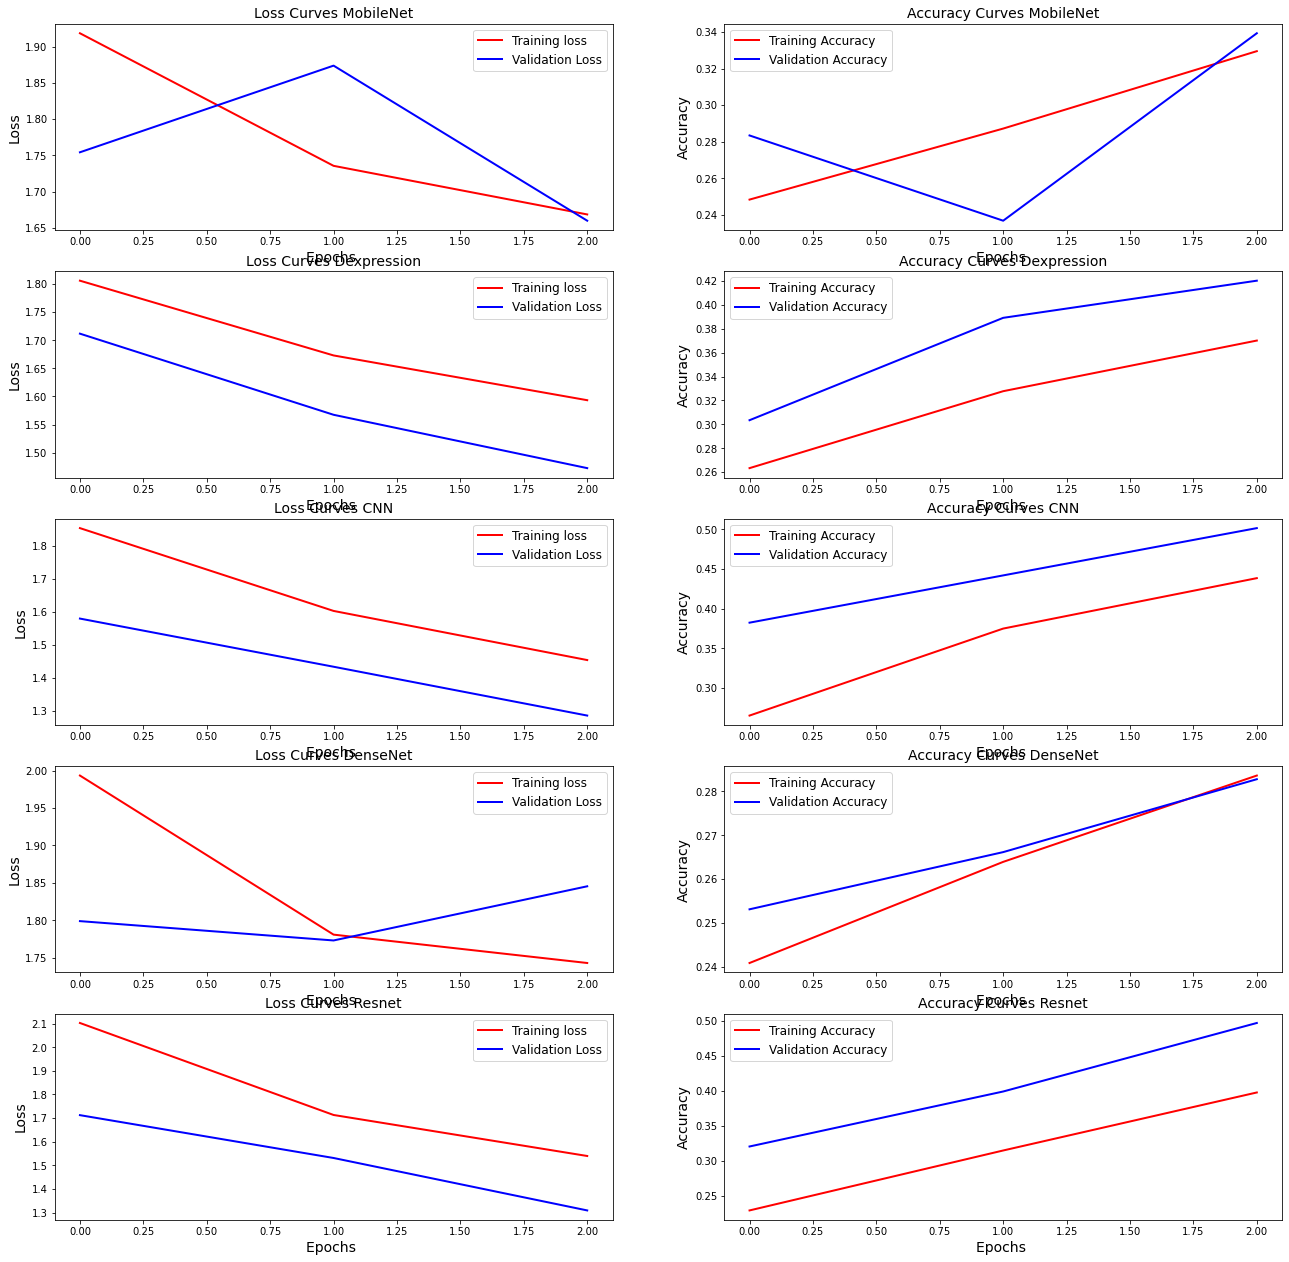

In [55]:
#for ploting the performance plot for all three model
fig,axes=plt.subplots(5,2,figsize=(22, 22))

for (m,history), ax in zip({'MobileNet':mobile_history,'Dexpression':dexpression_history,'CNN':CNN_history,'DenseNet':dense_net_history,'Resnet':resnet_history}.items(),axes):
  # Loss Curves
  ax[0].plot(history.history['loss'],'r',linewidth=2.0)
  ax[0].plot(history.history['val_loss'],'b',linewidth=2.0)
  ax[0].legend(['Training loss', 'Validation Loss'],fontsize=12)
  ax[0].set_xlabel('Epochs ',fontsize=14)
  ax[0].set_ylabel('Loss',fontsize=14)
  ax[0].set_title('Loss Curves '+m,fontsize=14)

  # Accuracy Curves
  ax[1].plot(history.history['accuracy'],'r',linewidth=2.0)
  ax[1].plot(history.history['val_accuracy'],'b',linewidth=2.0)
  ax[1].legend(['Training Accuracy', 'Validation Accuracy'],fontsize=12)
  ax[1].set_xlabel('Epochs ',fontsize=14)
  ax[1].set_ylabel('Accuracy',fontsize=14)
  ax[1].set_title('Accuracy Curves '+m,fontsize=14)



In [56]:
#safe the accuracy /loss plot
plt.savefig('plots.png')

<Figure size 432x288 with 0 Axes>

# **Classification reports**

In [57]:
model_name=['MobileNet','Dexpression','Custom CNN','DenseNet','Resnet']
iter_=0

In [58]:
#classification record of all three model
for model in [mobile_model,dexpression,CNN,dense_net_model,resnet_model]:
    ypred=model.predict(X_test)
    ypred_=np.argmax(ypred, axis=1)
    ytest_=np.argmax(y_test, axis=1)
    print("-------"+model_name[iter_]+"-------")
    print(classification_report(ytest_, ypred_,digits=3))
    iter_=iter_+1

-------MobileNet-------
              precision    recall  f1-score   support

           0      0.000     0.000     0.000       993
           1      0.000     0.000     0.000       113
           2      0.000     0.000     0.000      1026
           3      0.487     0.682     0.568      1810
           4      0.215     0.684     0.327      1165
           5      0.452     0.524     0.485       808
           6      0.000     0.000     0.000      1263

    accuracy                          0.342      7178
   macro avg      0.165     0.270     0.197      7178
weighted avg      0.209     0.342     0.251      7178

-------Dexpression-------
              precision    recall  f1-score   support

           0      0.239     0.300     0.266       993
           1      0.000     0.000     0.000       113
           2      0.291     0.024     0.045      1026
           3      0.568     0.810     0.668      1810
           4      0.315     0.140     0.194      1165
           5      0.501     

# **Confusion Matrix**

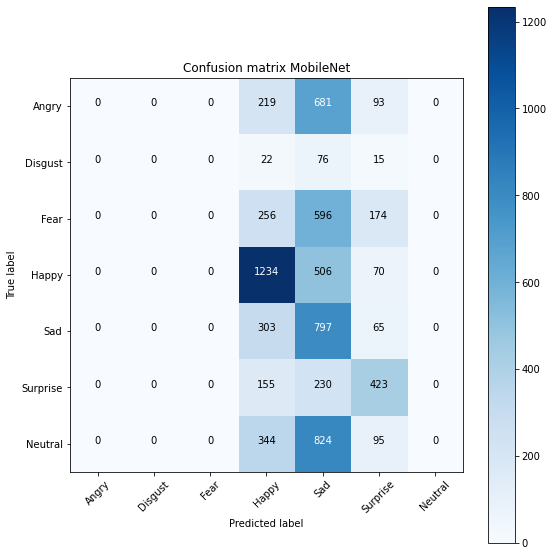

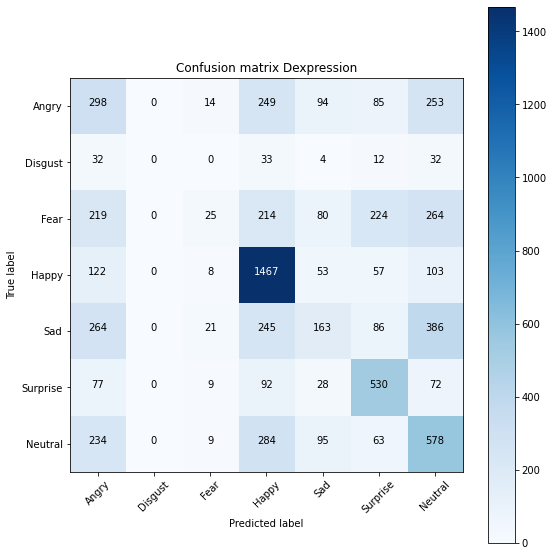

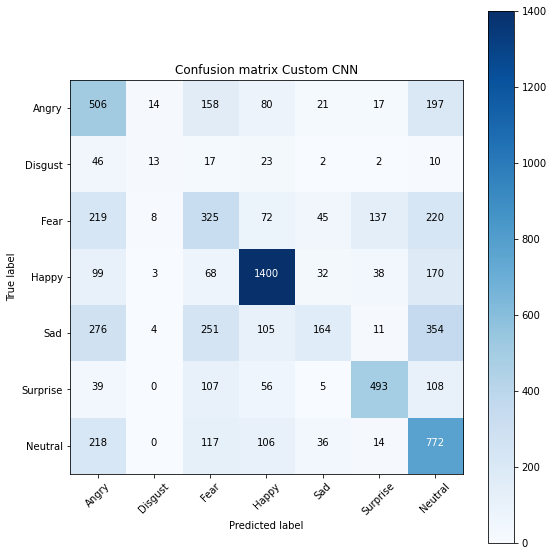

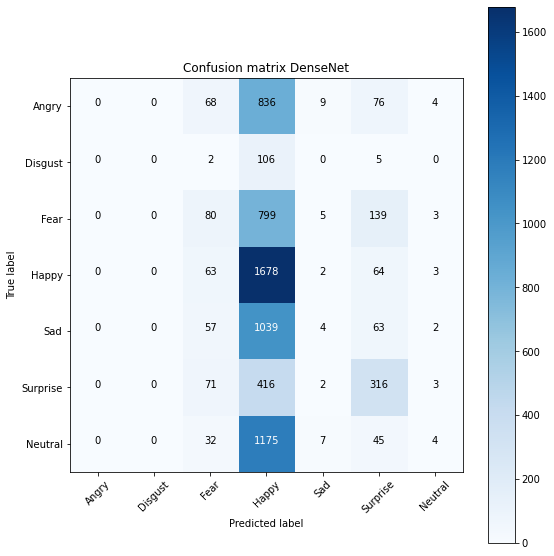

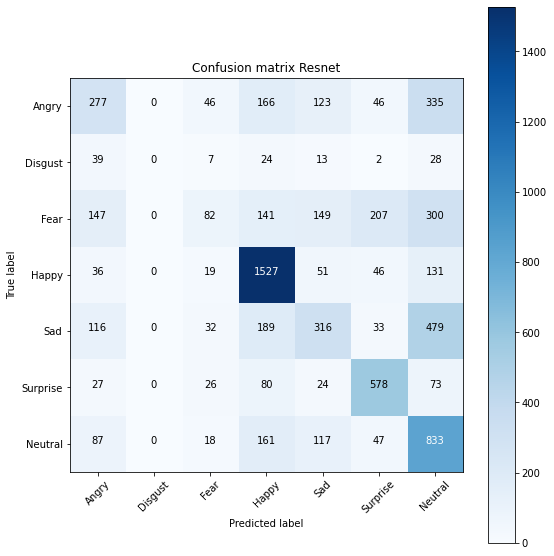

In [59]:
#confusion matix for all three models
import itertools
for model,i in zip([mobile_model,dexpression,CNN,dense_net_model,resnet_model],[1,2,3,4,5]):
    fig = plt.figure(figsize=(8, 8))
    
    ypred=model.predict(X_test)
    rounded_predections=np.argmax(ypred, axis=1)
    rounded_labels=np.argmax(y_test, axis=1)
    cm = confusion_matrix(rounded_labels, rounded_predections)
    labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
    title='Confusion matrix '+model_name[i-1]
    

    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.savefig('confusion_matrix_'+model.name+'.png')
    plt.show()

# **5 :ResNet**

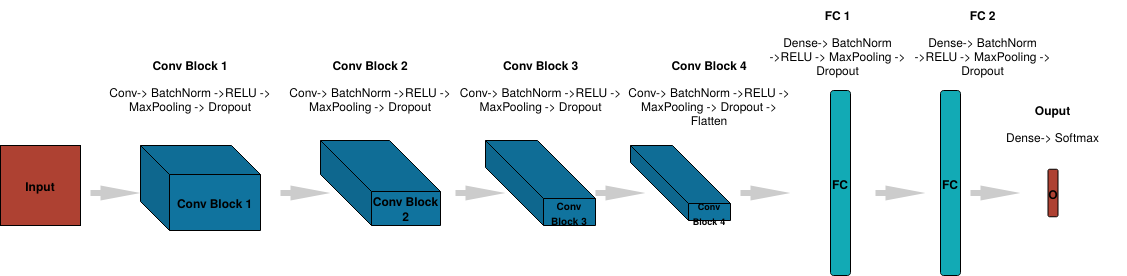

ImageDataGenerator

horizontal and vertical shift => moving all pixels of image in one direction

width_shift_range ( horizonatal shift)

height_shift_range (vertical shift)

floating num [0- 1] --> % of shift horizontal n vertical flips augmentation ==>reversing rows or cols of pixels --> True or False

Random rotation --> 0 - 360 degrees --> rotation_range = 90 ==> means random rotation to image blw 0 and 90 degrees

random brightness --> randomly darkens or brightens images ==> brightness_range =[0.2,1.0] --> means darkens or brightens if pixel is blw 0.2 and 1 random zoom either adds pixel or subtract pixels in image . [1-value, 1+value] for example , zoom_range = .3 --> range [0.7, 1.3] or blw 70%(zoom in) and 130% (zoomout)

In [60]:

# model.save("fmodel.h5")

In [61]:
# #model save into json formate 
# model_yaml = model.to_json()
# with open("model.yaml", "w") as yaml_file:
#      yaml_file.write(model_yaml)


In [62]:
# #plot for the model accuracy score
# sns.set()
# fig = plt.figure(0, (12, 4))

# ax = plt.subplot(1, 2, 1)
# sns.lineplot(history.epoch, history.history['accuracy'], label='train')
# sns.lineplot(history.epoch, history.history['val_accuracy'], label='valid')
# plt.title('Accuracy')
# plt.tight_layout()

# ax = plt.subplot(1, 2, 2)
# sns.lineplot(history.epoch, history.history['loss'], label='train')
# sns.lineplot(history.epoch, history.history['val_loss'], label='valid')
# plt.title('Loss')
# plt.tight_layout()

# plt.savefig('epoch_history_dcnn.png')
# plt.show()

In [63]:
# #train and validation accuracy plot
# df_accu = pd.DataFrame({'train': history.history['accuracy'], 'valid': history.history['val_accuracy']})
# df_loss = pd.DataFrame({'train': history.history['loss'], 'valid': history.history['val_loss']})

# fig = plt.figure(0, (14, 4))
# ax = plt.subplot(1, 2, 1)
# sns.violinplot(x="variable", y="value", data=pd.melt(df_accu), showfliers=False)
# plt.title('Accuracy')
# plt.tight_layout()

# ax = plt.subplot(1, 2, 2)
# sns.violinplot(x="variable", y="value", data=pd.melt(df_loss), showfliers=False)
# plt.title('Loss')
# plt.tight_layout()

# plt.savefig('performance_dist.png')
# plt.show()

In [64]:
# # Printing the classification report of all models
# for model in [model]:
#     ypred=model.predict(X_test)
#     ypred_=np.argmax(ypred, axis=1)
#     y_test_=np.argmax(y_test, axis=1)
#     print(classification_report(y_test_, ypred_,digits=8))

# **Confusion Matrix**

In [65]:
# #for  confusion matix plot
# import itertools
# from sklearn.metrics import confusion_matrix
# from matplotlib.pyplot import figure


# for model,i in zip([model],[1]):
#     fig = figure(figsize=(10, 10))
    
#     ypred=model.predict(X_test)
#     rounded_predections=np.argmax(ypred, axis=1)
#     rounded_labels=np.argmax(y_test, axis=1)
#     cm = confusion_matrix(rounded_labels, rounded_predections)
#     labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
#     title='Confusion matrix '+model.name
    

#     plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
#     plt.title(title)
#     plt.colorbar()
#     tick_marks = np.arange(len(labels))
#     plt.xticks(tick_marks, labels, rotation=45)
#     plt.yticks(tick_marks, labels)
#     fmt = 'd'
#     thresh = cm.max() / 2.
#     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#         plt.text(j, i, format(cm[i, j], fmt),
#                 horizontalalignment="center",
#                 color="white" if cm[i, j] > thresh else "black")

#     plt.ylabel('True label')
#     plt.xlabel('Predicted label')
#     plt.tight_layout()
#     plt.savefig('confusion_matrix_'+model.name+'.png')
#     plt.show()

In [66]:
# # Save best Model
# model.save('final_model.h5')

In [67]:
# # Saving model in json format along with weights
# fer_json = model.to_json()  
# with open("fer.json", "w") as json_file:  
#     json_file.write(fer_json)  
# model.save_weights("fer.h5")


In [68]:
# # import dependencies

# from IPython.display import display, Javascript, Image,clear_output
# from google.colab.output import eval_js
# from base64 import b64decode, b64encode
# import cv2
# import numpy as np
# import PIL
# import io
# import html
# import time

In [69]:
# # initialize the Haar Cascade face detection model
# face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [70]:
# # JavaScript to properly create our live video stream using our webcam as input
# def video_stream():
#   js = Javascript('''
#     var video;
#     var div = null;
#     var stream;
#     var captureCanvas;
#     var imgElement;
#     var labelElement;
    
#     var pendingResolve = null;
#     var shutdown = false;
    
#     function removeDom() {
#        stream.getVideoTracks()[0].stop();
#        video.remove();
#        div.remove();
#        video = null;
#        div = null;
#        stream = null;
#        imgElement = null;
#        captureCanvas = null;
#        labelElement = null;
#     }
    
#     function onAnimationFrame() {
#       if (!shutdown) {
#         window.requestAnimationFrame(onAnimationFrame);
#       }
#       if (pendingResolve) {
#         var result = "";
#         if (!shutdown) {
#           captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
#           result = captureCanvas.toDataURL('image/jpeg', 0.8)
#         }
#         var lp = pendingResolve;
#         pendingResolve = null;
#         lp(result);
#       }
#     }
    
#     async function createDom() {
#       if (div !== null) {
#         return stream;
#       }

#       div = document.createElement('div');
#       div.style.border = '2px solid black';
#       div.style.padding = '3px';
#       div.style.width = '100%';
#       div.style.maxWidth = '600px';
#       document.body.appendChild(div);
      
#       const modelOut = document.createElement('div');
#       modelOut.innerHTML = "<span>Status:</span>";
#       labelElement = document.createElement('span');
#       labelElement.innerText = 'No data';
#       labelElement.style.fontWeight = 'bold';
#       modelOut.appendChild(labelElement);
#       div.appendChild(modelOut);
           
#       video = document.createElement('video');
#       video.style.display = 'block';
#       video.width = div.clientWidth - 6;
#       video.setAttribute('playsinline', '');
#       video.onclick = () => { shutdown = true; };
#       stream = await navigator.mediaDevices.getUserMedia(
#           {video: { facingMode: "environment"}});
#       div.appendChild(video);

#       imgElement = document.createElement('img');
#       imgElement.style.position = 'absolute';
#       imgElement.style.zIndex = 1;
#       imgElement.onclick = () => { shutdown = true; };
#       div.appendChild(imgElement);
      
#       const instruction = document.createElement('div');
#       instruction.innerHTML = 
#           '<span style="color: red; font-weight: bold;">' +
#           'When finished, click here or on the video to stop this demo</span>';
#       div.appendChild(instruction);
#       instruction.onclick = () => { shutdown = true; };
      
#       video.srcObject = stream;
#       await video.play();

#       captureCanvas = document.createElement('canvas');
#       captureCanvas.width = 640; //video.videoWidth;
#       captureCanvas.height = 480; //video.videoHeight;
#       window.requestAnimationFrame(onAnimationFrame);
      
#       return stream;
#     }
#     async function stream_frame(label, imgData) {
#       if (shutdown) {
#         removeDom();
#         shutdown = false;
#         return '';
#       }

#       var preCreate = Date.now();
#       stream = await createDom();
      
#       var preShow = Date.now();
#       if (label != "") {
#         labelElement.innerHTML = label;
#       }
            
#       if (imgData != "") {
#         var videoRect = video.getClientRects()[0];
#         imgElement.style.top = videoRect.top + "px";
#         imgElement.style.left = videoRect.left + "px";
#         imgElement.style.width = videoRect.width + "px";
#         imgElement.style.height = videoRect.height + "px";
#         imgElement.src = imgData;
#       }
      
#       var preCapture = Date.now();
#       var result = await new Promise(function(resolve, reject) {
#         pendingResolve = resolve;
#       });
#       shutdown = false;
      
#       return {'create': preShow - preCreate, 
#               'show': preCapture - preShow, 
#               'capture': Date.now() - preCapture,
#               'img': result};
#     }
#     ''')

#   display(js)
  
# def video_frame(label, bbox):
#   data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
#   return data

In [71]:
# # function to convert the JavaScript object into an OpenCV image
# def js_to_image(js_reply):
#   """
#   Params:
#           js_reply: JavaScript object containing image from webcam
#   Returns:
#           img: OpenCV BGR image
#   """
#   # decode base64 image
#   image_bytes = b64decode(js_reply.split(',')[1])
#   # convert bytes to numpy array
#   jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
#   # decode numpy array into OpenCV BGR image
#   img = cv2.imdecode(jpg_as_np, flags=1)

#   return img

# # function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
# def bbox_to_bytes(bbox_array):
#   """
#   Params:
#           bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
#   Returns:
#         bytes: Base64 image byte string
#   """
#   # convert array into PIL image
#   bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
#   iobuf = io.BytesIO()
#   # format bbox into png for return
#   bbox_PIL.save(iobuf, format='png')
#   # format return string
#   bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

#   return bbox_bytes

In [72]:
# # Defining function to detect face
# def face_detect():
#   import cv2
#   from PIL import Image
#   import numpy as np
#   import os
#   from keras.models import load_model
#   from time import sleep
#   from keras.preprocessing.image import img_to_array
#   from keras.preprocessing import image
# # start streaming video from webcam
#   video_stream()
# # label for video
#   label_html = 'Capturing...'
# # initialze bounding box to empty
#   bbox = ''
#   count = 0
#   face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml') # Face Detection
#   classifier =load_model('/content/final_model.h5')  #Load model
#   emotion_labels = ['Angry','Disgust','Fear','Happy','Neutral', 'Sad', 'Surprise'] 

#   while True:
#     js_reply = video_frame(label_html, bbox)
#     if not js_reply:
#       break

#     # convert JS response to OpenCV Image
#     img = js_to_image(js_reply["img"])

#     # create transparent overlay for bounding box
#     bbox_array = np.zeros([480,640,4], dtype=np.uint8)

#     # grayscale image for face detection
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#     # get face region coordinates
#     faces = face_cascade.detectMultiScale(gray)
#     # get face bounding box for overlay
#     for (x,y,w,h) in faces:
#       bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(0,255,0),2)
#       roi_gray = gray[y:y+h,x:x+w]
#       roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)  ##Face Cropping for prediction
#       if np.sum([roi_gray])!=0:
#         roi = roi_gray.astype('float')/255.0
#         roi = img_to_array(roi)
#         roi = np.expand_dims(roi,axis=0) ## reshaping the cropped face image for prediction
#         prediction = classifier.predict(roi)[0]   #Prediction
#         label=emotion_labels[prediction.argmax()]
#         label_position = (x,y)
#         cv2.putText(bbox_array,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)   # Text Adding
#       else:
#         cv2.putText(bbox_array,'No Faces',(30,80),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)

    



#     bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
#     # convert overlay of bbox into bytes
#     bbox_bytes = bbox_to_bytes(bbox_array)
#     # update bbox so next frame gets new overlay
#     bbox = bbox_bytes

In [73]:
# # Finally detecting the face with live webcam
# face_detect()

# **Conclusion:**
The data preprocessing takes time for processing each image.

Deepface, CNN, dexpression, ResNet, and Xception were among the models evaluated. 

ResNet has the highest accuracy of all, with a validation set accuracy of 72 percent and a training set accuracy of 66 percent.


Since, the emotion counts of disgust and fear images are less therefore on local webcam it hardly detect those emotions.

The codes which are deployed are on my github repository.

It was such an amazing and interesting project. Learnt a lot from this.